## Задание:
1.	Выберите набор данных (датасет) для решения задачи классификации или регресии.
2.	В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3.	С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4.	Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5.	Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6.	Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.


### Загрузка данных

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve,confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
for col in data.columns:
    print('{} - {}'.format(col, data[data[col].isnull()].shape[0]))

Pregnancies - 0
Glucose - 0
BloodPressure - 0
SkinThickness - 0
Insulin - 0
BMI - 0
DiabetesPedigreeFunction - 0
Age - 0
Outcome - 0


In [6]:
data.shape

(768, 9)

### Разделение на обучающую и тестовую выборки

In [9]:
CLASS = 'Outcome'
RANDOM_STATE = 17
TEST_SIZE = 0.3

X = data.drop(CLASS, axis=1).values
Y = data[CLASS].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=Y)
print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (537, 8)
X_test: (231, 8)


### Обучение

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import mean_squared_error

In [11]:
template = "Отклонение на тренируемой выборке: {:.3f} \
отклонение на тестовой выборке: {:.3f}"

In [12]:
class Classifier():
  def __init__(self, method, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.target_1 = []
    self.target_2 = []
   
  def training(self):
    self._method.fit(self.x_train, self.y_train)
    self.target_1 = self._method.predict(self.x_train)
    self.target_2 = self._method.predict(self.x_test)
    
  def result(self, metric):
    print(template.format(metric(self.y_train, self.target_1), 
                      metric(self.y_test, self.target_2)))

### RandomForestClassifier

In [15]:
rfr = Classifier(RandomForestClassifier(max_features=1), X_train, Y_train, X_test, Y_test)
rfr.training()
rfr.result(mean_squared_error)

Отклонение на тренируемой выборке: 0.017 отклонение на тестовой выборке: 0.294


c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### GradientBoostingClassifier

In [16]:
gbc = Classifier(GradientBoostingClassifier(max_features=1), X_train, Y_train, X_test, Y_test)
gbc.training()
gbc.result(mean_squared_error)

Отклонение на тренируемой выборке: 0.106 отклонение на тестовой выборке: 0.212


### Подбор гиперпараметра K 

### RandomForestClassifier

In [47]:
from sklearn.model_selection import GridSearchCV

In [56]:
n_range = np.array(range(1,9))
param_grid = {'max_features':n_range}
cl_rfc_gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
# cl_rfc_gs.fit(X, y)
# cl_rfc_gs = RandomForestClassifier(n_estimators=200)
cl_rfc_gs.fit(X_train, Y_train)

c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
cl_rfc_gs.best_params_

{'max_features': 3}

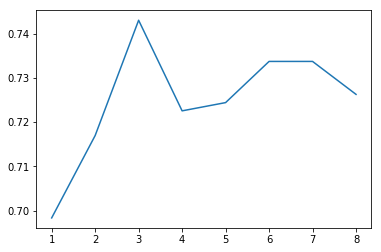

In [58]:
plt.plot(n_range, cl_rfc_gs.cv_results_['mean_test_score'])

### GradientBoostingClassifier

In [59]:
n_range = np.array(range(4,9,1))
param_grid = {'max_features':n_range}
cl_gbc_gs = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3, scoring='accuracy')
cl_gbc_gs.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [60]:
cl_gbc_gs.best_params_

{'max_features': 5}

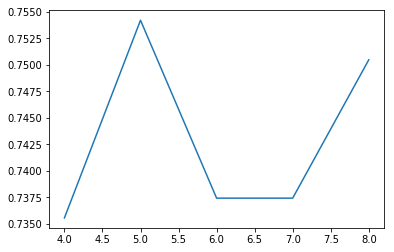

In [61]:
plt.plot(n_range, cl_gbc_gs.cv_results_['mean_test_score'])

### Сравнение моделей 

In [62]:
rfr2 = Classifier(RandomForestClassifier(max_features=3), X_train, Y_train, X_test, Y_test)
rfr2.training()
rfr2.result(mean_squared_error)

Отклонение на тренируемой выборке: 0.015 отклонение на тестовой выборке: 0.268


c:\users\helen\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
rfr.result(mean_squared_error)

Отклонение на тренируемой выборке: 0.017 отклонение на тестовой выборке: 0.294


In [64]:
gbc2 = Classifier(GradientBoostingClassifier(max_features=5), X_train, Y_train, X_test, Y_test)
gbc2.training()
gbc2.result(mean_squared_error)

Отклонение на тренируемой выборке: 0.067 отклонение на тестовой выборке: 0.234


In [65]:
gbc.result(mean_squared_error)

Отклонение на тренируемой выборке: 0.106 отклонение на тестовой выборке: 0.212


Итак, подбор гиперпараметров уменьшил ошибку.